In [1]:
import numpy as np
from sklearn import datasets
import math
from sklearn.metrics.pairwise import euclidean_distances 
from statistics import mean
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# K-Moyennes

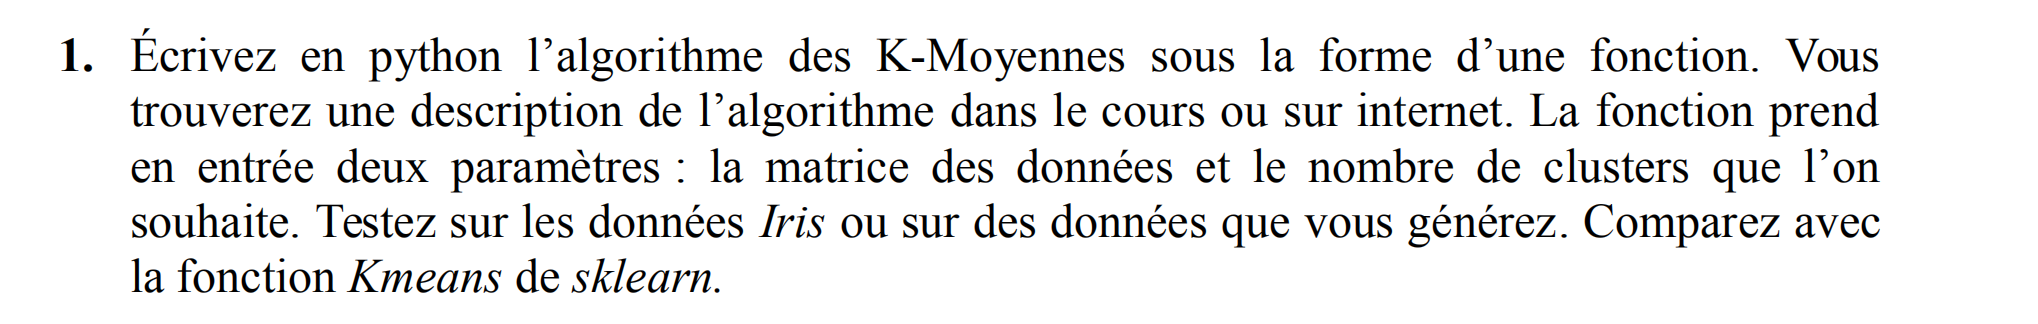

In [2]:
iris = datasets.load_iris()

In [11]:
def k_moy(X , K ,max_iter = 200):
    
    centroid = X[np.random.choice(range(len(X)), size=K, replace=False)]
    
    for i in range(max_iter):
        
        dis = euclidean_distances(X,centroid) #calculer la distance entre centroid et les données
        clusters = np.asarray([ np.argmin(i.reshape(-1,1)) for i in dis ]) # affecter les données ou plus loin cluster
        #centroid = np.asarray([np.mean(X[clusters == i],0) for i in range(0, K)])
        oldCentroid = centroid.copy() 
        for i in np.unique(clusters) :
            centroid[i] = np.mean(X[clusters == i],0) # claculer les moyennes des clusters pour obtenir les nouveaux centroids
        
    return clusters

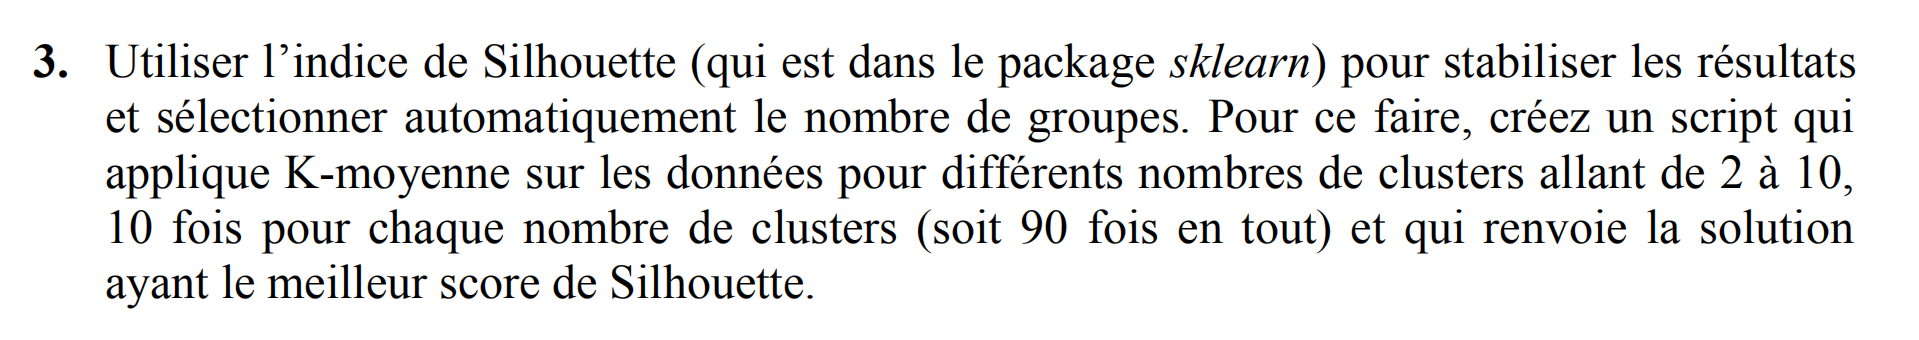

range(2, 11)
2


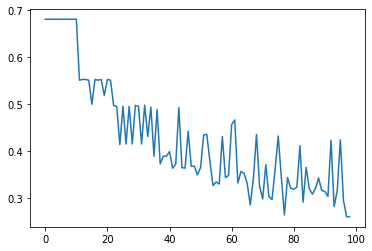

In [15]:
silh = []
K = range(2,11)
for k in K:
    for j in range(11):
        
        lbl = k_moy(iris.data , k)
        silh.append(silhouette_score(iris.data , lbl))

print(K[np.argmax(silh)])
plt.plot(range(0,99) ,silh)

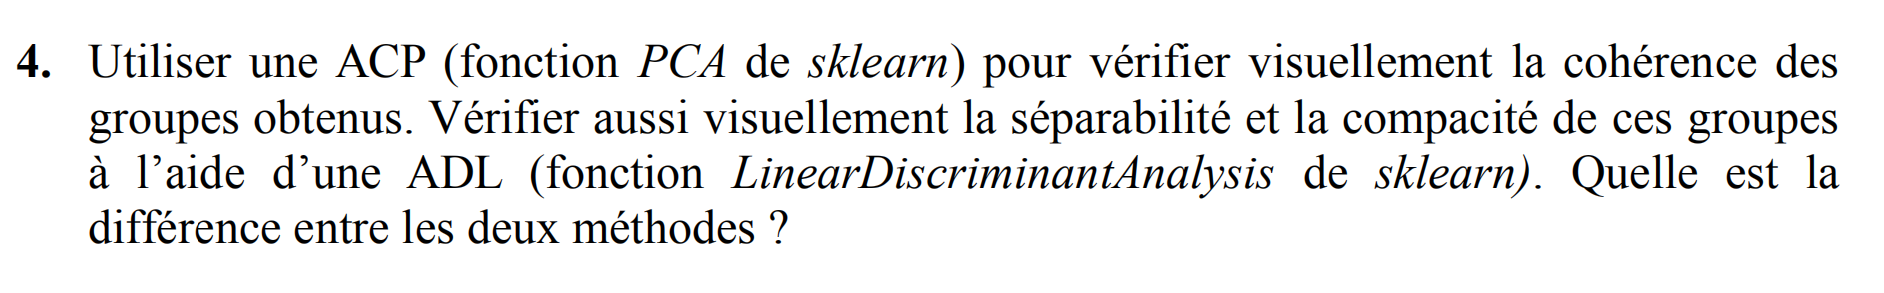

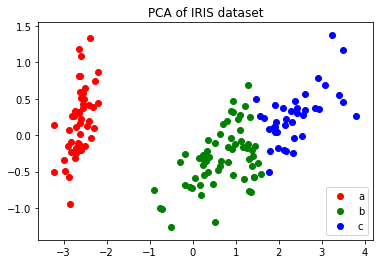

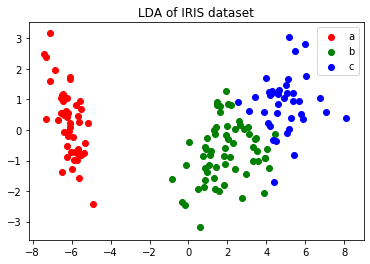

In [16]:
X = iris.data
y = k_moy(iris.data , 3)

lda = LDA()
fitLDA = lda.fit(X, y)
IrisLDA = fitLDA.transform(X)

pca = PCA()
fitPCA = pca.fit(X, y)
IrisPCA = fitPCA.transform(X)

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], ['a','b','c']):
    plt.scatter(IrisPCA[y == i, 0], IrisPCA[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA of IRIS dataset')

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], ['a','b','c']):
    plt.scatter(IrisLDA[y == i, 0], IrisLDA[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('LDA of IRIS dataset')

plt.show()

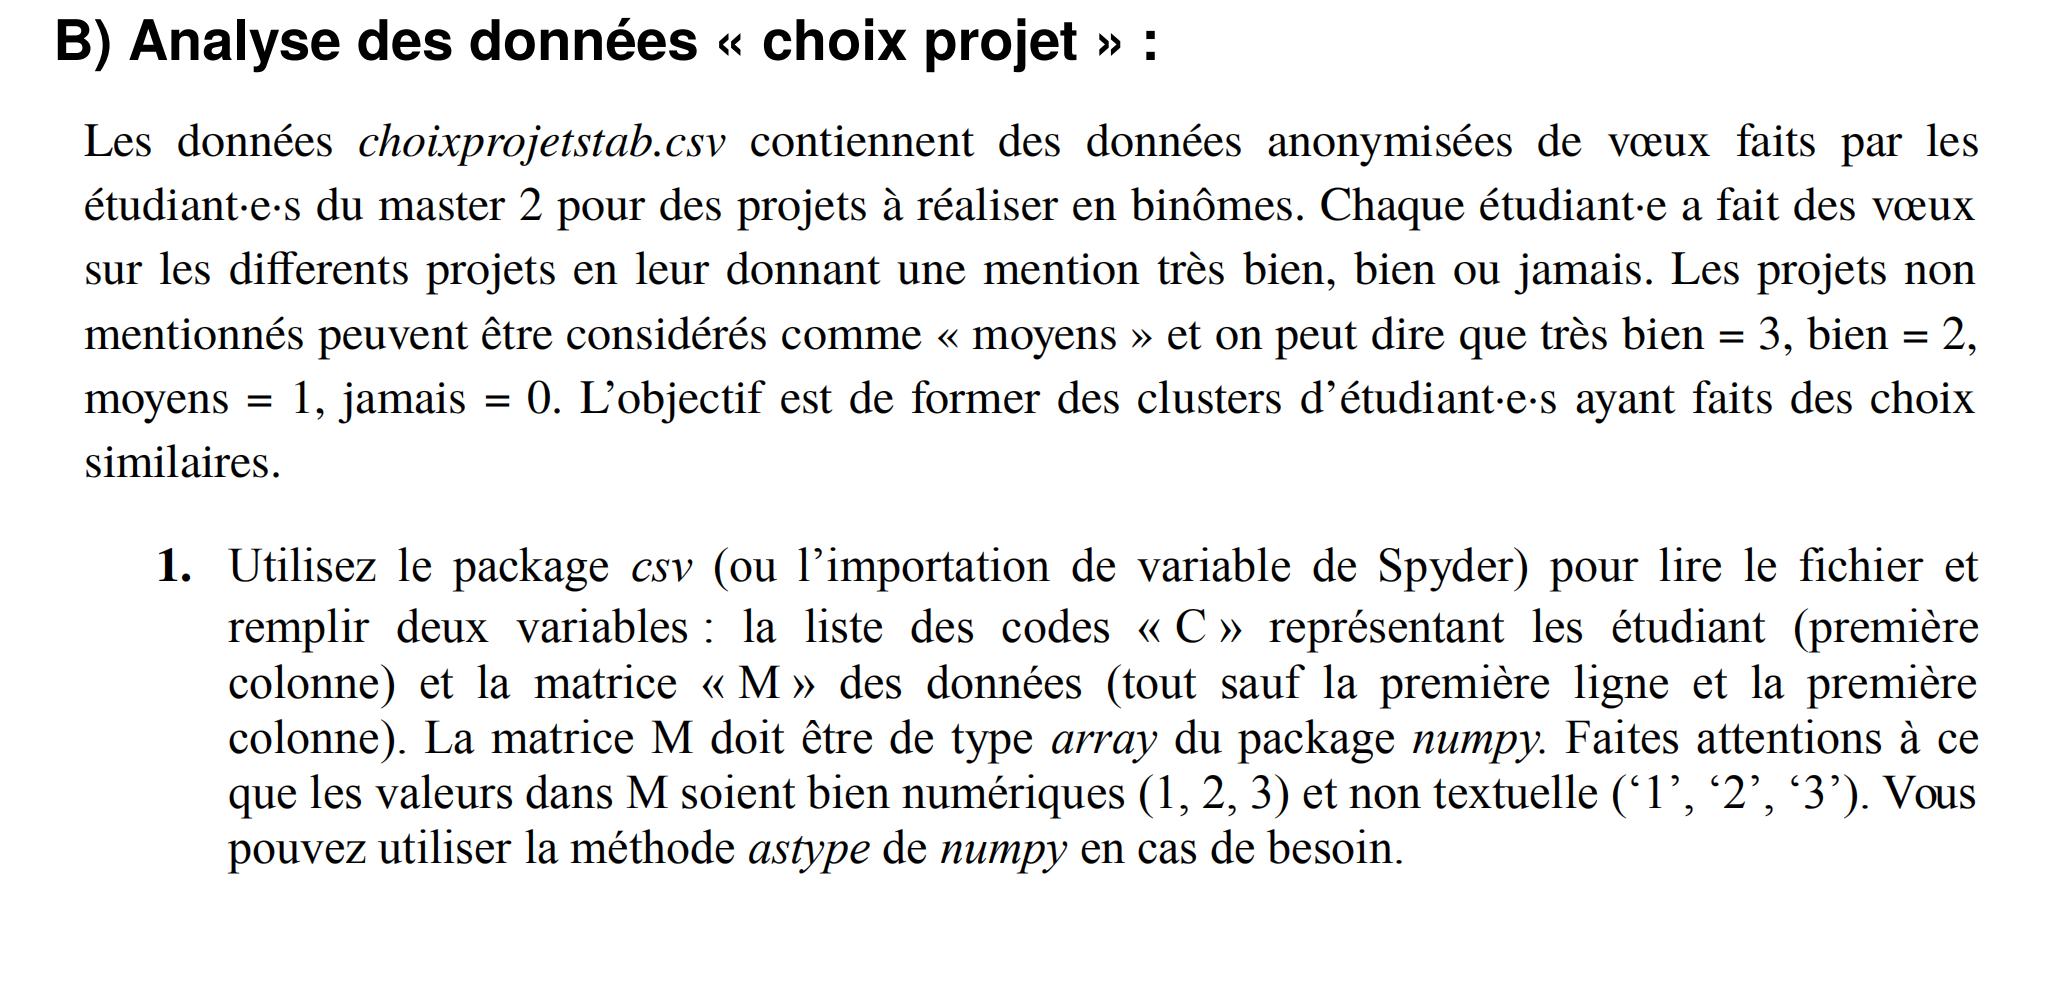

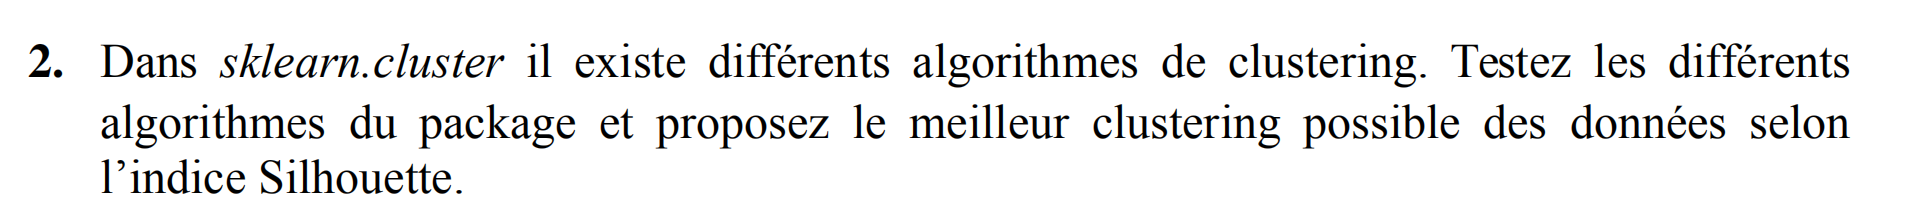

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv(r'C:\Users\PC\Desktop\data_mining\choixprojetstab.csv',sep = ";").to_numpy()

In [20]:
df

array([['bl/.vSDYCGrSs', 1, 1, ..., 1, 1, 3],
       ['bl/1NiMubceBs', 1, 1, ..., 1, 1, 1],
       ['bl/dvgMTLVSvk', 0, 0, ..., 1, 0, 0],
       ...,
       ['bly3Oqsvf6WlU', 1, 1, ..., 1, 0, 2],
       ['bly69tf4z1FiM', 1, 1, ..., 1, 1, 1],
       ['blzon470EHguA', 1, 1, ..., 0, 1, 1]], dtype=object)

In [21]:
df[:,1:]

array([[1, 1, 1, ..., 1, 1, 3],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 2],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1]], dtype=object)

In [24]:
from sklearn.cluster import KMeans,MeanShift,AgglomerativeClustering,DBSCAN

3


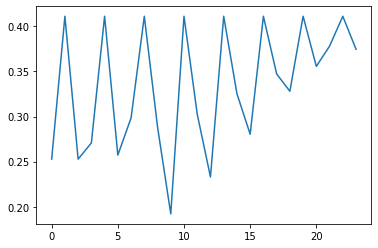

In [41]:
silh = []

for k in range(2,10):
    
    models=[KMeans(n_clusters=k),MeanShift(),AgglomerativeClustering(n_clusters=k)]
    for algo in models:
        algores = algo.fit(df[:,1:]).labels_
        silh.append(silhouette_score(df[:,1:] , algores))
    
    
print(K[np.argmax(silh)])
plt.plot(range(0 , 24) ,silh)